# Coursework 2 - Loan Default Probability 


The goal of this case study is to build a machine learning model to predict the probability that a loan will default. By the end of the analysis you should be able to recommend a choice of model and associated hyperparameters.

I will provide you with guidance on what to do. Please follow it. You are free to propose and test your own additional modelling suggestions at the end of the notebook. Make sure you describe this clearly.

## Overview

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
        * [3.2.1.  Features elimination by significant missing values ](#2.2.1)
        * [3.2.2.  Features elimination based on the intutiveness](#2.2.2)
        * [3.2.3.  Features elimination based on the correlation](#2.2.3)   
* [4. Feature Engineering and Exploratory Analysis](#3)
    * [4.1 Feature Analysis and Exploration](#3.1)
        * [4.1.1. Analysing the categorical features](#3.1.1)
        * [4.1.2  Analysing the continuous features ](#3.1.2) 
    * [4.2.Encoding Categorical Data](#3.2)
    * [4.3.Sampling Data](#3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. You want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

## 2.1. Load all the python packages you need here

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#----------------- Data Preprocessing -------------------#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#----------------- Model Libraries ----------------------#
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
#-------------- Model Performance metrics ----------------#
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
#---------------- Hyperparameter tuning ------------------#
from sklearn.model_selection import GridSearchCV
#------------------- Feature Selection -------------------#
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

<a id='1.2'></a>
## 2.2. Loading the Data

### Load the data in this step. This is in the form of a zipped csv file LoansData_sample.csv.gz - see how you load a zipped csv file in the pandas documentation. Use a utf-8 encoding. Call the dataframe "dataset"

In [2]:
dataset = pd.read_csv('LoansData_sample.csv.gz', compression='gzip', encoding='utf-8')

### Examine the properties of the data frame

In [3]:
dataset.shape

(100000, 151)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 151 entries, Unnamed: 0 to settlement_term
dtypes: float64(115), int64(2), object(34)
memory usage: 115.2+ MB


In [5]:
dataset.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
398,398,37721612,NaN,16000.0,16000.0,16000.0,36 months,7.49,497.63,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
31645,31645,32479082,NaN,17625.0,17625.0,17625.0,60 months,17.14,439.36,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
27957,27957,34302515,NaN,10000.0,10000.0,9975.0,36 months,12.39,334.01,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
70862,70862,28422801,NaN,8400.0,8400.0,8400.0,36 months,8.39,264.74,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
87790,87790,25187226,NaN,12000.0,12000.0,12000.0,36 months,13.35,406.36,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(100000, 151)

In [7]:
dataset.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,100000.000000,1.000000e+05,0.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,...,185.0,185.000000,185.0,185.000000,152.000000,185.000000,185.000000,1290.000000,1290.000000,1290.000000
mean,49999.500000,3.029995e+07,NaN,14886.930000,14886.930000,14883.910500,13.278073,437.331824,7.468924e+04,18.769787,...,3.0,110.335568,3.0,14.037838,323.495132,8046.616541,186.563135,4768.376357,47.720519,8.265116
std,28867.657797,4.763500e+06,NaN,8504.432514,8504.432514,8502.519174,4.390210,244.317648,5.809527e+04,8.539769,...,0.0,89.266601,0.0,9.657374,267.627244,5585.653253,168.552986,3703.963945,7.046587,8.263566
min,0.000000,5.716700e+04,NaN,1000.000000,1000.000000,1000.000000,6.000000,30.420000,4.000000e+03,0.000000,...,3.0,1.470000,3.0,0.000000,4.410000,174.150000,0.040000,233.160000,0.550000,0.000000
25%,24999.750000,2.737015e+07,NaN,8000.000000,8000.000000,8000.000000,10.150000,261.640000,4.500000e+04,12.320000,...,3.0,23.760000,3.0,7.000000,63.885000,2465.360000,27.610000,1951.125000,45.000000,0.000000
50%,49999.500000,3.052556e+07,NaN,13050.000000,13050.000000,13050.000000,12.990000,380.180000,6.400000e+04,18.210000,...,3.0,96.580000,3.0,15.000000,281.580000,8049.850000,172.460000,3881.120000,45.040000,6.000000
75%,74999.250000,3.438201e+07,NaN,20000.000000,20000.000000,20000.000000,15.610000,573.320000,9.000000e+04,24.760000,...,3.0,164.750000,3.0,22.000000,481.492500,11968.940000,285.890000,6503.000000,50.000000,14.000000
max,99999.000000,3.809811e+07,NaN,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.500000e+06,39.990000,...,3.0,382.340000,3.0,32.000000,1147.020000,21750.750000,757.420000,26751.740000,100.000000,36.000000


In [8]:
dataset.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


### The column to predict is loan_status. Look at the values it takes and their counts.

In [9]:
dataset['loan_status'].value_counts()    

loan_status
Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: count, dtype: int64

<Axes: ylabel='loan_status'>

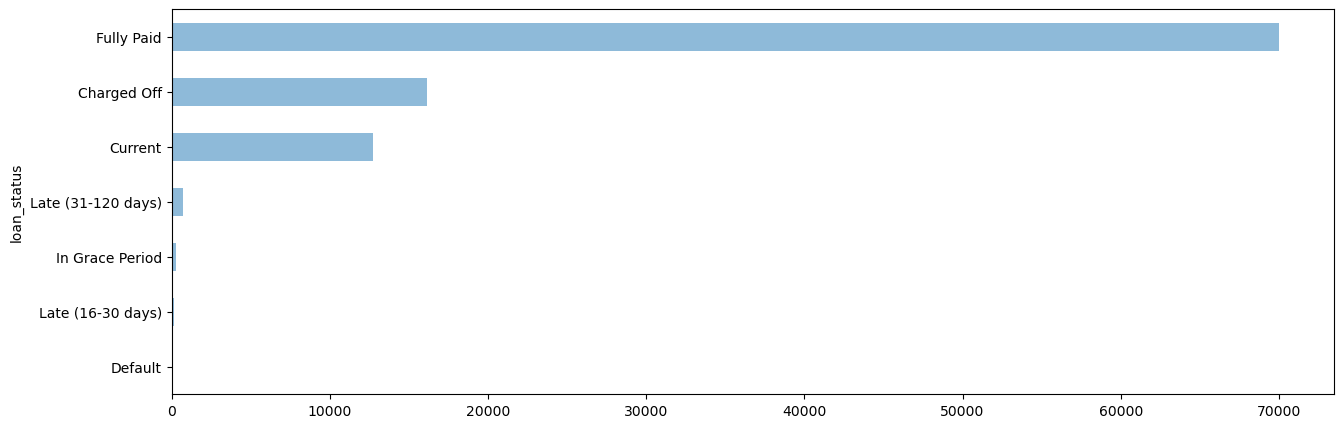

In [10]:
plt.figure(figsize=(15, 5))
dataset['loan_status'].value_counts().sort_values().plot(kind='barh', alpha=0.5)

### You need to try to learn differences in the features between completed loans that have been fully paid or charged off. Don't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So only keep the loans with status "Fully Paid" or "Charged Off." Count the number of each.

loan_status
Fully Paid     69982
Charged Off    16156
Name: count, dtype: int64


<Axes: ylabel='loan_status'>

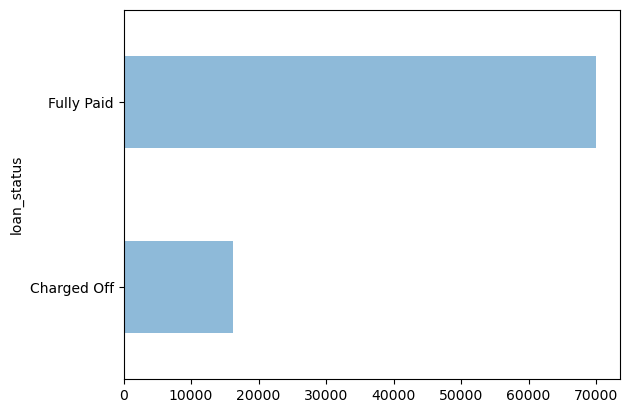

In [11]:
dataset = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]
print(dataset['loan_status'].value_counts())
dataset['loan_status'].value_counts().sort_values().plot(kind='barh', alpha=0.5)

Just take a look at the new dataset size

In [12]:
dataset.shape

(86138, 151)

### Is this an unbalanced dataset ?

In [13]:
ratio = dataset['loan_status'].value_counts()[1] / dataset.shape[0]
print('Charged Off occurance in the dataset:' ,  round(100*ratio,1) , '%')
print('Fully Paid occurance in the dataset:' ,  round(100*(1-ratio),1) , '%')

Charged Off occurance in the dataset: 18.8 %
Fully Paid occurance in the dataset: 81.2 %


 We will take this imbalance into account when training our models, use appropriate metrics for evaluation (and not just accuracy), and consider applying resampling techniques or using class weights to mitigate the effects of imbalance.

### Set the labels to be 1 for Charged off else 0

In [14]:
dataset['loan_status'] = dataset['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})
print(dataset['loan_status'])
print(dataset['loan_status'].value_counts())

0        0
1        1
2        0
4        1
5        0
        ..
99994    0
99995    0
99996    0
99998    1
99999    0
Name: loan_status, Length: 86138, dtype: int64
loan_status
0    69982
1    16156
Name: count, dtype: int64


<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

In [15]:
dataset.isnull().mean()

Unnamed: 0               0.000000
id                       0.000000
member_id                1.000000
loan_amnt                0.000000
funded_amnt              0.000000
                           ...   
settlement_status        0.985407
settlement_date          0.985407
settlement_amount        0.985407
settlement_percentage    0.985407
settlement_term          0.985407
Length: 151, dtype: float64

### Drop the columns with more than 30% of missing data.

In [16]:
for i in dataset.columns:
    if dataset[i].isnull().mean() > 0.3:
        print('Deleted:', i) 
        dataset.drop(i, axis=1, inplace=True)

Deleted: member_id
Deleted: desc
Deleted: mths_since_last_delinq
Deleted: mths_since_last_record
Deleted: next_pymnt_d
Deleted: mths_since_last_major_derog
Deleted: annual_inc_joint
Deleted: dti_joint
Deleted: verification_status_joint
Deleted: open_acc_6m
Deleted: open_act_il
Deleted: open_il_12m
Deleted: open_il_24m
Deleted: mths_since_rcnt_il
Deleted: total_bal_il
Deleted: il_util
Deleted: open_rv_12m
Deleted: open_rv_24m
Deleted: max_bal_bc
Deleted: all_util
Deleted: inq_fi
Deleted: total_cu_tl
Deleted: inq_last_12m
Deleted: mths_since_recent_bc_dlq
Deleted: mths_since_recent_revol_delinq
Deleted: revol_bal_joint
Deleted: sec_app_fico_range_low
Deleted: sec_app_fico_range_high
Deleted: sec_app_earliest_cr_line
Deleted: sec_app_inq_last_6mths
Deleted: sec_app_mort_acc
Deleted: sec_app_open_acc
Deleted: sec_app_revol_util
Deleted: sec_app_open_act_il
Deleted: sec_app_num_rev_accts
Deleted: sec_app_chargeoff_within_12_mths
Deleted: sec_app_collections_12_mths_ex_med
Deleted: sec_app_m

### How large is the remaining dataset ?

In [17]:
dataset.shape

(86138, 93)

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intutiveness

### In order to filter the features further I checked the description in the data dictionary and keep the features that are intuitive on the basis of subjective judgement. To do so I examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features I have decided to keep. Can you do the same.

In [18]:
keep_list = ['funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]

### Drop all of the features except these ones from the dataset.

In [19]:
dataset = dataset[keep_list]

### How large is the remaining dataset ?

In [20]:
dataset.shape

(86138, 39)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86138 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funded_amnt            86138 non-null  float64
 1   addr_state             86138 non-null  object 
 2   annual_inc             86138 non-null  float64
 3   application_type       86138 non-null  object 
 4   dti                    86138 non-null  float64
 5   earliest_cr_line       86138 non-null  object 
 6   emp_length             81421 non-null  object 
 7   emp_title              81416 non-null  object 
 8   fico_range_high        86138 non-null  float64
 9   fico_range_low         86138 non-null  float64
 10  grade                  86138 non-null  object 
 11  home_ownership         86138 non-null  object 
 12  id                     86138 non-null  int64  
 13  initial_list_status    86138 non-null  object 
 14  installment            86138 non-null  float64
 15  int_rat

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

### Now remove all of the features with a correlation of under 3% with the  charge-off label. List the names of the features you are removing.

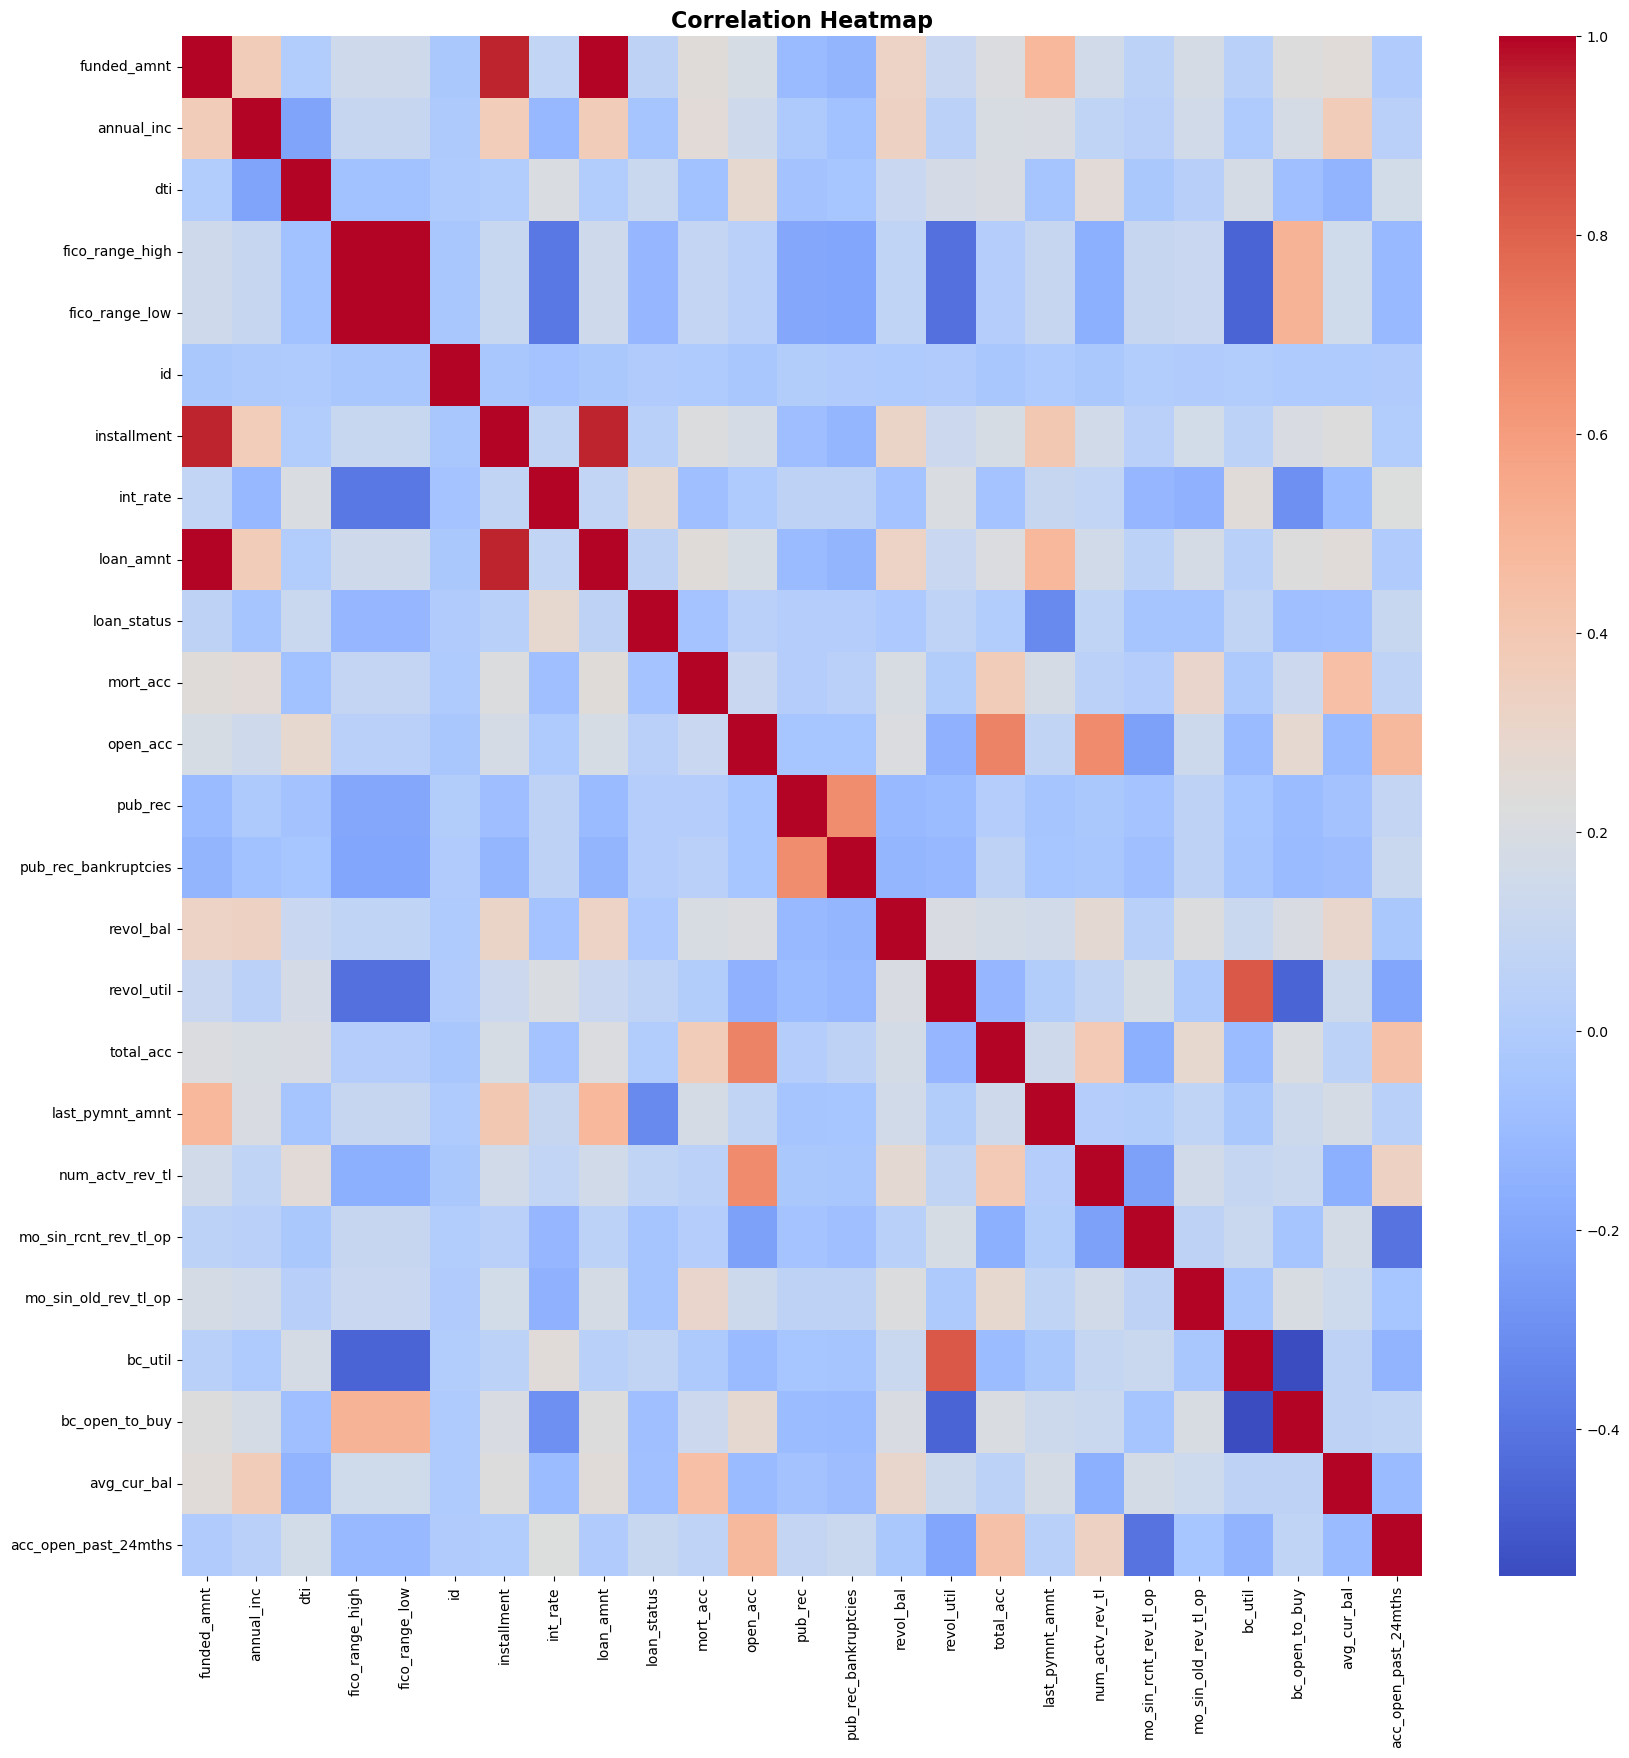

In [22]:
dataset_numerical = dataset.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 20))
sns.heatmap(dataset_numerical.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap', weight='bold', fontsize=16)
plt.show()

In [23]:
dataset.shape

(86138, 39)

In [24]:
correlation_matrix = dataset_numerical.corr()
target_corr = correlation_matrix['loan_status']

filtered_features = target_corr[abs(target_corr) > 0.03].index.tolist()

for i in dataset.columns:
    if pd.api.types.is_numeric_dtype(dataset[i]) or pd.api.types.is_float_dtype(dataset[i]):
        if i not in filtered_features:
            print('Deleted:', i) 
            dataset.drop(i, axis=1, inplace=True)

Deleted: id
Deleted: pub_rec
Deleted: pub_rec_bankruptcies
Deleted: revol_bal
Deleted: total_acc


In [25]:
dataset_numerical = dataset.select_dtypes(include=['int64', 'float64'])

correlation_matrix = dataset_numerical.corr()
target_corr = correlation_matrix['loan_status']
print(target_corr.sort_values(ascending=False))

loan_status              1.000000
int_rate                 0.282825
dti                      0.123108
acc_open_past_24mths     0.105989
bc_util                  0.077744
num_actv_rev_tl          0.071185
revol_util               0.066188
funded_amnt              0.060818
loan_amnt                0.060818
open_acc                 0.039430
installment              0.032847
mo_sin_rcnt_rev_tl_op   -0.048839
mo_sin_old_rev_tl_op    -0.049426
annual_inc              -0.050349
mort_acc                -0.057858
avg_cur_bal             -0.071977
bc_open_to_buy          -0.080077
fico_range_high         -0.121891
fico_range_low          -0.121892
last_pymnt_amnt         -0.319081
Name: loan_status, dtype: float64


### How large is the resulting dataset ?

In [26]:
dataset.shape

(86138, 34)

<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

### Examine the properties of the remaining features.

array([[<Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'fico_range_high'}>],
       [<Axes: title={'center': 'fico_range_low'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'loan_amnt'}>],
       [<Axes: title={'center': 'loan_status'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'last_pymnt_amnt'}>,
        <Axes: title={'center': 'num_actv_rev_tl'}>,
        <Axes: title={'center': 'mo_sin_rcnt_rev_tl_op'}>,
        <Axes: title={'center': 'mo_sin_old_rev_tl_op'}>],
       [<Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'avg_cur_bal'}>,
        <Axes: title={'center': 'acc_open_past_24mths

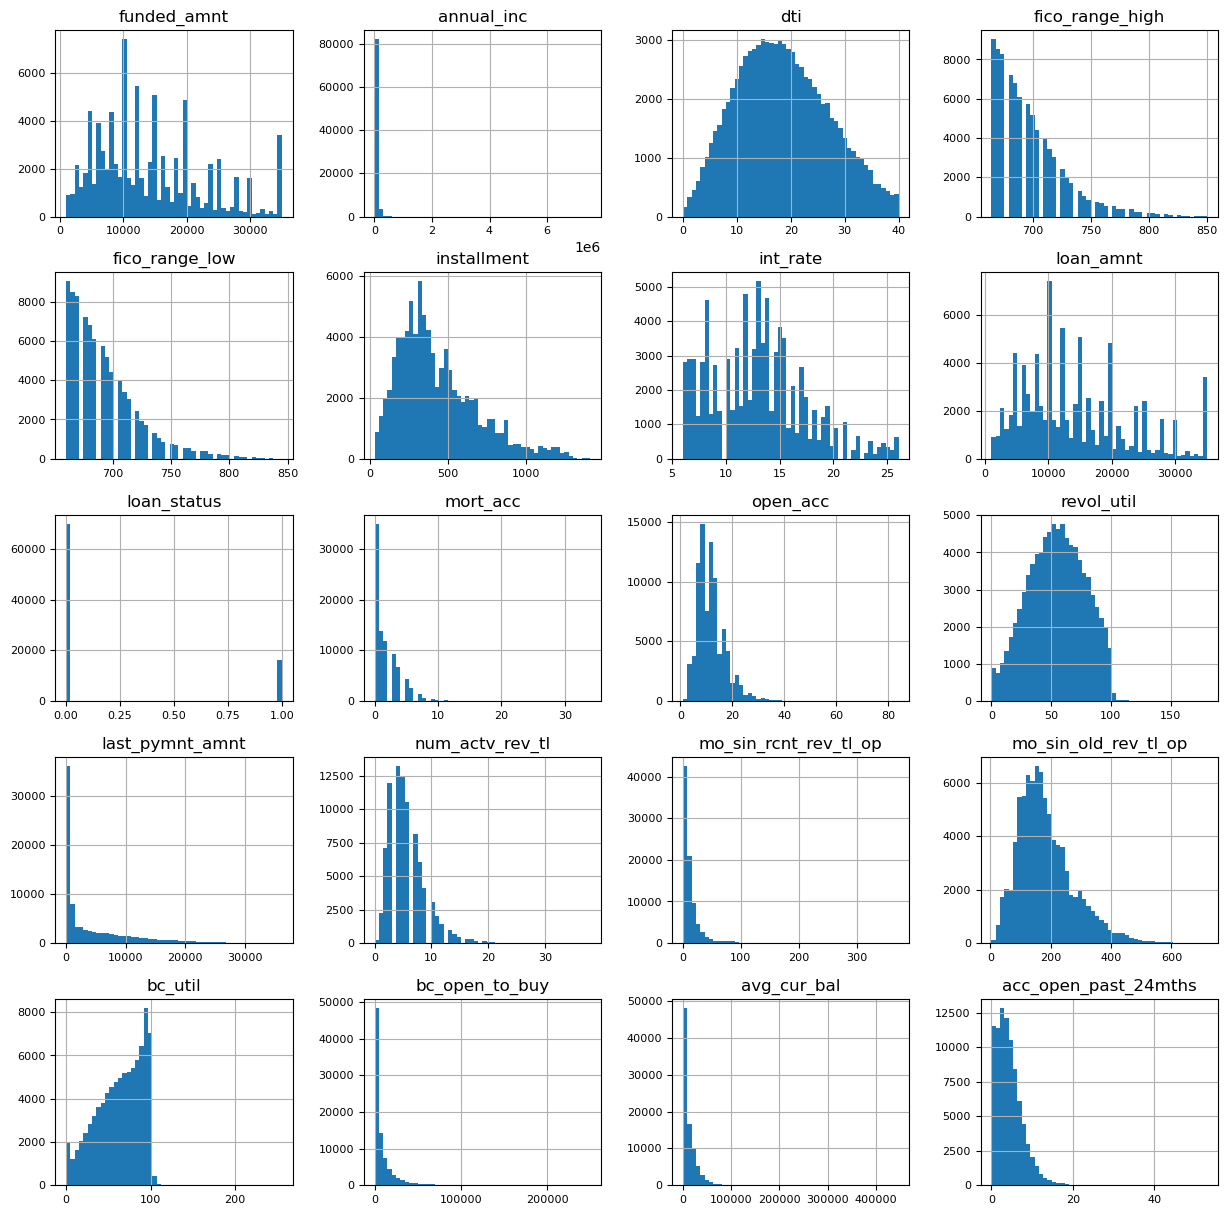

In [27]:
dataset.hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [28]:
dataset.describe()

,funded_amnt,annual_inc,dti,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,revol_util,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
count,86138.000000,8.613800e+04,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86094.000000,86138.000000,86138.000000,86138.000000,86138.000000,85089.000000,85142.000000,86138.000000,86138.000000
mean,14106.526446,7.384311e+04,18.532747,696.463024,692.462966,430.737187,13.002360,14106.526446,0.187559,1.748880,11.746453,54.582777,4757.453184,5.762358,12.796896,183.524333,63.808959,8942.506507,13066.638371,4.594732
std,8391.139221,5.929352e+04,8.538247,29.731848,29.731549,251.653139,4.397419,8391.139221,0.390362,2.091488,5.433122,23.515901,6466.767327,3.224598,16.224586,93.266430,27.051347,14100.186250,16232.739293,3.070996
min,1000.000000,4.000000e+03,0.000000,664.000000,660.000000,30.420000,6.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7800.000000,4.500000e+04,12.070000,674.000000,670.000000,248.480000,9.490000,7800.000000,0.000000,0.000000,8.000000,37.200000,358.522500,3.000000,3.000000,118.000000,44.100000,1087.000000,3010.000000,2.000000
50%,12000.000000,6.247372e+04,17.950000,689.000000,685.000000,370.480000,12.990000,12000.000000,0.000000,1.000000,11.000000,54.900000,1241.230000,5.000000,8.000000,167.000000,67.700000,3823.000000,6994.500000,4.000000
75%,20000.000000,9.000000e+04,24.500000,709.000000,705.000000,568.005000,15.610000,20000.000000,0.000000,3.000000,14.000000,72.500000,7303.205000,7.000000,15.000000,232.000000,87.500000,10588.000000,17905.000000,6.000000
max,35000.000000,7.500000e+06,39.990000,850.000000,845.000000,1408.130000,26.060000,35000.000000,1.000000,34.000000,84.000000,180.300000,36234.440000,38.000000,372.000000,718.000000,255.200000,249625.000000,447433.000000,53.000000


<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features 

### List the categorical features and take a decision on what to do with them - drop them or process them. Explain your decisions.

In [29]:
categorical_variables = dataset.select_dtypes(include=['object'])
print(categorical_variables.columns)

Index(['addr_state', 'application_type', 'earliest_cr_line', 'emp_length',
       'emp_title', 'grade', 'home_ownership', 'initial_list_status',
       'purpose', 'sub_grade', 'term', 'title', 'verification_status',
       'zip_code'],
      dtype='object')


We construct a function that will help us to visualize how the target variable is distributed according to the specific categorical feature

In [30]:
def view_relationship(categorical_variable, target, dataset):

    plt.figure(figsize=(8, 6))
    sns.violinplot(x=categorical_variable, y=target, data=dataset, inner='quartile', palette='Set1')
    plt.title('Distribution of '+ target + ' by ' + categorical_variable, weight='bold', fontsize=16)
    plt.xlabel(categorical_variable)
    plt.ylabel(target)
    plt.ylim(-0.1, 1.1)
    plt.show()

zip_code

In [31]:
dataset['zip_code'].value_counts

<bound method IndexOpsMixin.value_counts of 0        235xx
1        937xx
2        658xx
4        850xx
5        077xx
         ...  
99994    719xx
99995    606xx
99996    874xx
99998    630xx
99999    468xx
Name: zip_code, Length: 86138, dtype: object>

We clearly drop this variable as there are exactly one single value affected for every row

In [32]:
dataset.drop('zip_code', axis=1, inplace=True)

addr_state

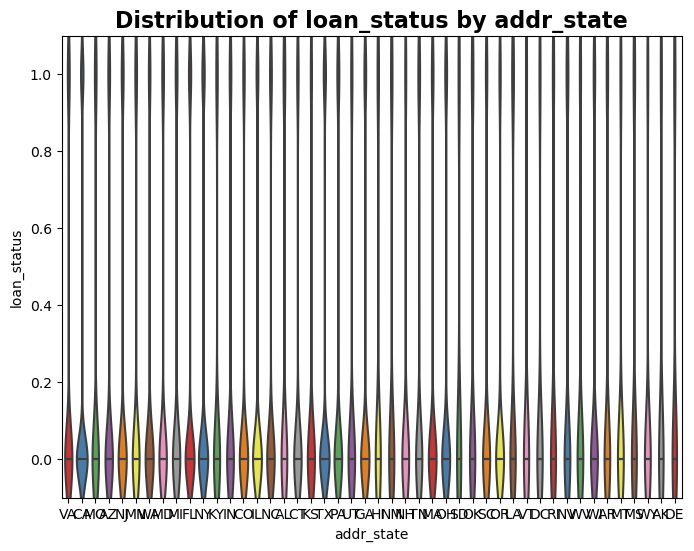

In [33]:
view_relationship('addr_state', 'loan_status', dataset)

We keep grade as the distribution of the target variable differs according to this variable values

application_type

<Axes: ylabel='application_type'>

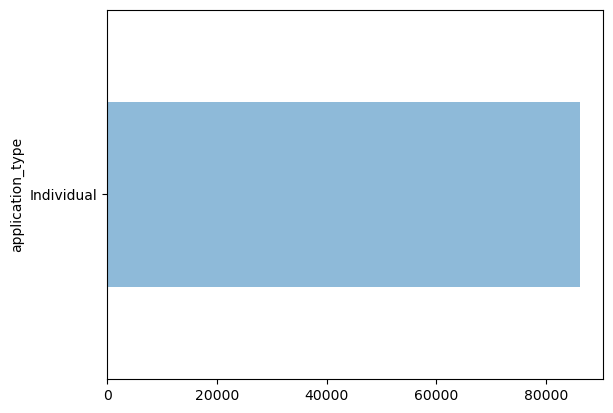

In [34]:
dataset['application_type'].value_counts().plot(kind='barh', alpha=0.5)

We decide to drop application_type as it is not usefull for the prediction as it has one single value

In [35]:
dataset.drop('application_type', axis=1, inplace=True)

grade

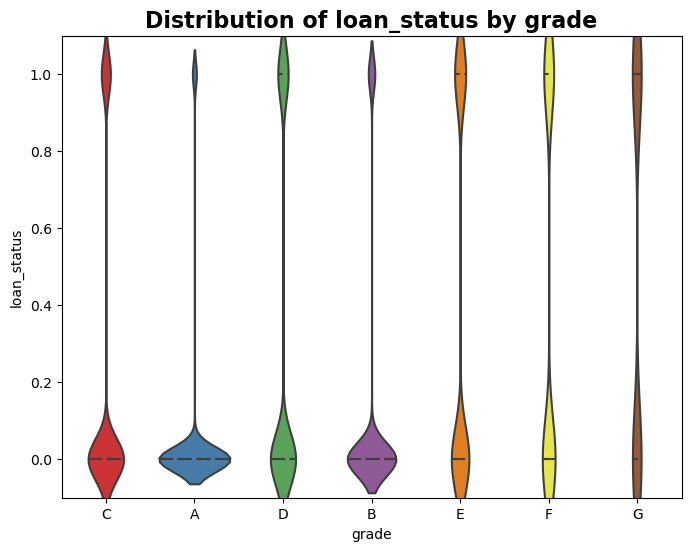

In [36]:
view_relationship('grade', 'loan_status', dataset)

We keep grade as the distribution of the target variable differs according to this variable values

home_ownership

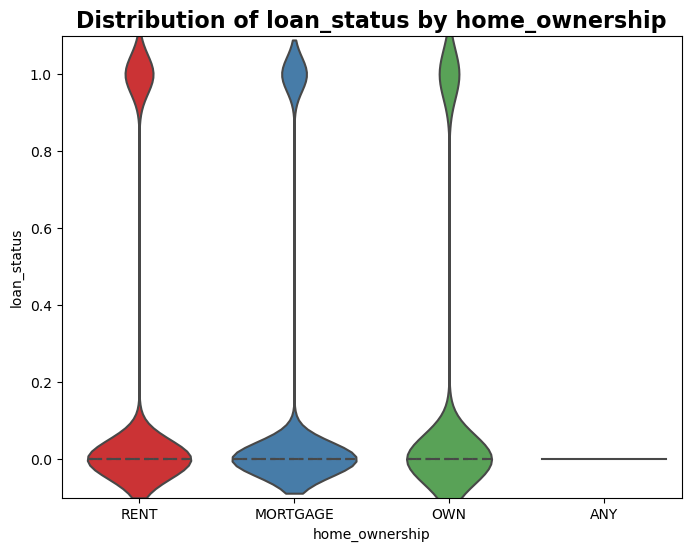

In [37]:
view_relationship('home_ownership', 'loan_status', dataset)

We keep home_ownership

earliest_cr_line

In [38]:
dataset['earliest_cr_line'].value_counts()

earliest_cr_line
Aug-2001    744
Aug-2000    694
Aug-2002    650
Sep-2000    620
Sep-2002    604
           ... 
Aug-1963      1
Jul-1959      1
Jul-1966      1
Aug-1962      1
Aug-1958      1
Name: count, Length: 598, dtype: int64

We decide to drop earliest_cr_line

In [39]:
dataset.drop('earliest_cr_line', axis=1, inplace=True)

emp_title

In [40]:
dataset['emp_title'].value_counts()

emp_title
Teacher                          1576
Manager                          1437
Registered Nurse                  687
Owner                             681
RN                                651
                                 ... 
Laser printer operator              1
Oil Field Laborer                   1
VP, Project Management              1
Material Supply Technician          1
Occupational Theapy Assistant       1
Name: count, Length: 32987, dtype: int64

We decide to drop emp_title as there are so many different values

In [41]:
dataset.drop('emp_title', axis=1, inplace=True)

initial_list_status

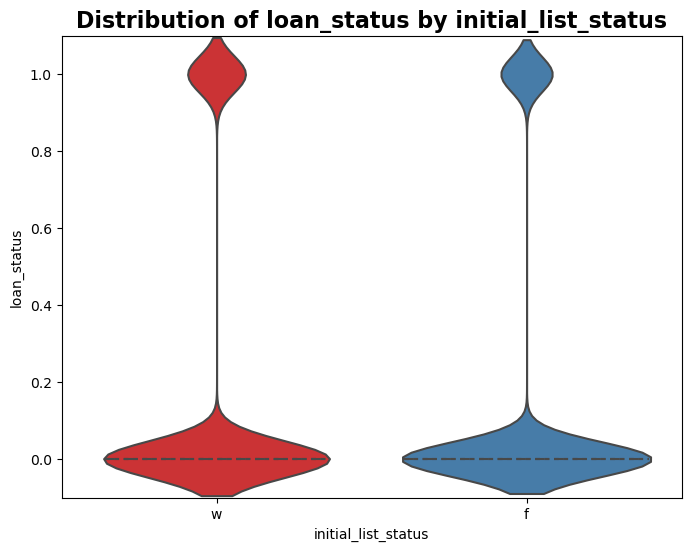

In [42]:
view_relationship('initial_list_status', 'loan_status', dataset)

We decide to keep initial_list_status

purpose

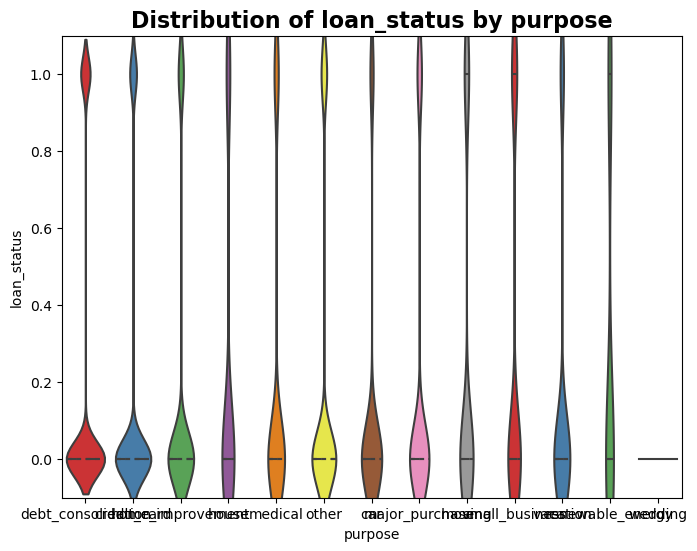

In [43]:
view_relationship('purpose', 'loan_status', dataset)

We decide to keep purpose as the distribution of the target variable is not the same according to the values of this variable

title

In [44]:
dataset['title'].value_counts()

title
Debt consolidation          52990
Credit card refinancing     19048
Home improvement             4428
Other                        4371
Major purchase               1498
Medical expenses              898
Business                      768
Car financing                 730
Moving and relocation         602
Vacation                      448
Home buying                   284
Green loan                     65
debt payoff                     1
Consolidation                   1
debt pay off                    1
Engagement Ring Purchase        1
Finish line                     1
Debt Clean up                   1
Getting out of debt             1
mlue                            1
Name: count, dtype: int64

As this variable represents the reason of the loan, one should think this variable is importnat, hence lets perform some feature engineering as this variable has a lot of values but inequally distributed

In [45]:
keep_titles = ['Debt consolidation', 'Credit card refinancing']
dataset['title'] = dataset['title'].apply(lambda x: x if x in keep_titles else 'Other')

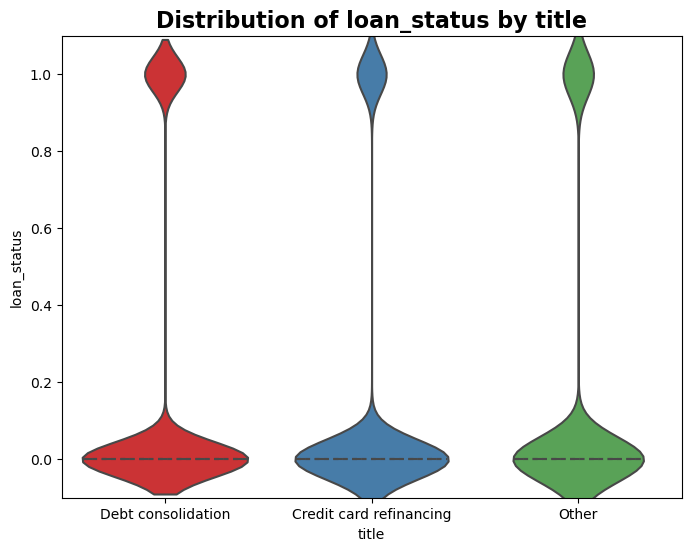

In [46]:
view_relationship('title', 'loan_status', dataset)

The target variable seems to be spread similarly according to the 2 main values of this variable, and as the other value does not reflect the pure reality of the varaible values, we decide to drop it

In [47]:
dataset.drop('title', axis=1, inplace=True)

verification_status

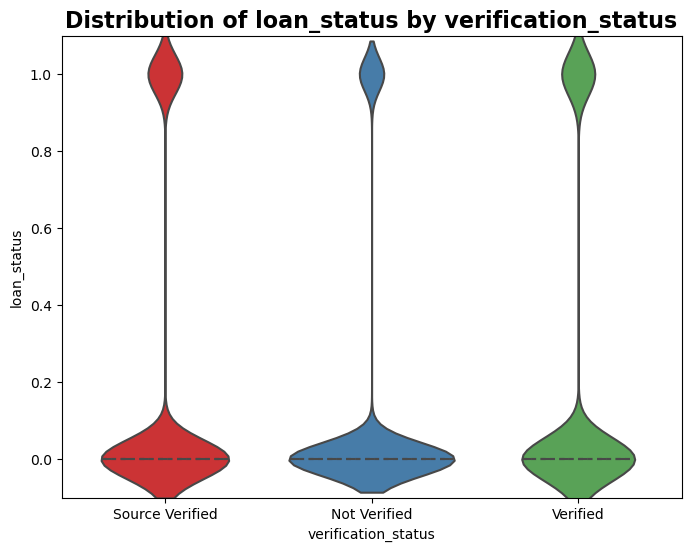

In [48]:
view_relationship('verification_status', 'loan_status', dataset)

We keep verification_status

### Convert Term to a numerical feature

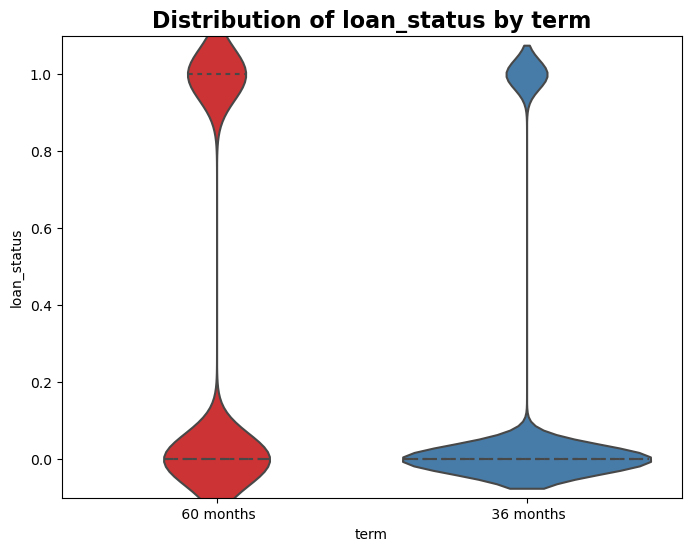

In [49]:
view_relationship('term', 'loan_status', dataset)

In [50]:
dataset['term'] = dataset['term'].str.extract('(\d+)').astype(int)
dataset['term'].value_counts()

term
36    67507
60    18631
Name: count, dtype: int64

### Decide if you want to do anything to emp_length

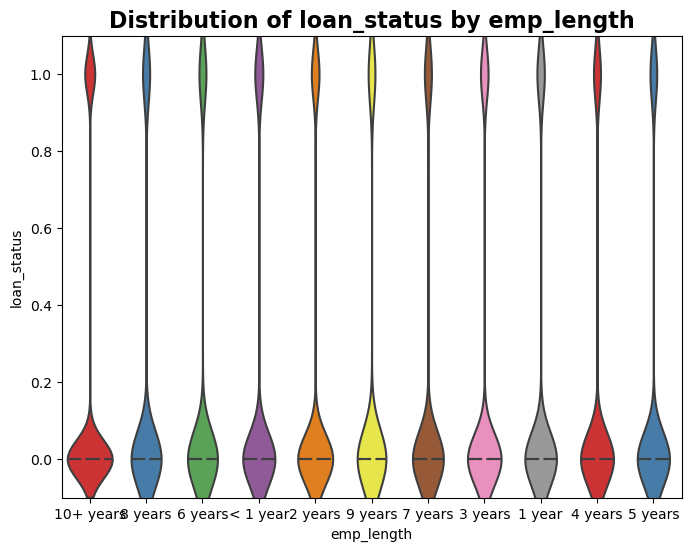

In [51]:
view_relationship('emp_length', 'loan_status', dataset)

We decide to drop it as the target variable is distributed almost the same for all the values of emp_length

In [52]:
dataset = dataset.drop(['emp_length'], axis=1)

### Is sub_grade worth keeping ?

Sub grade don't provide additional information, grade is enough

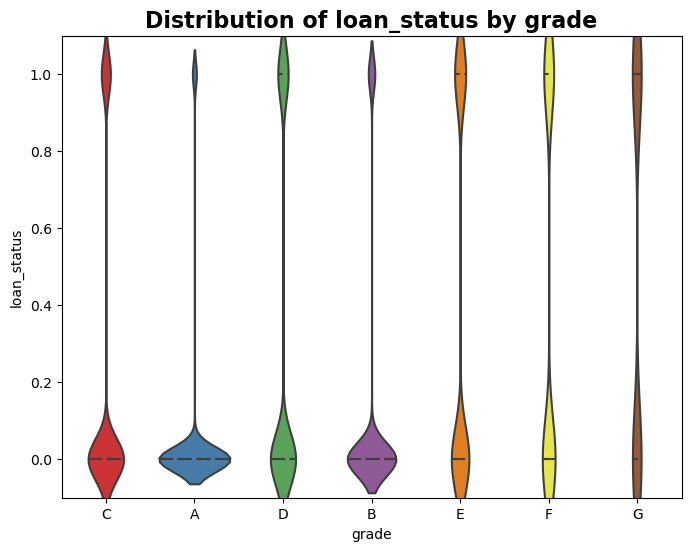

In [53]:
view_relationship('grade', 'loan_status', dataset)

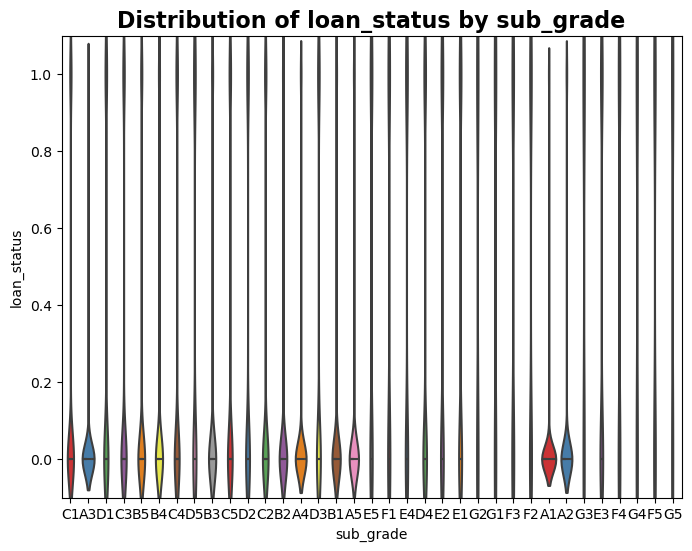

In [54]:
view_relationship('sub_grade', 'loan_status', dataset)

We decide to keep the sub_grade variable as the distribution of the target varibale differs accorfing to the values of this variable. It adds further information to grade

What are the remaining categorical variables ?

In [55]:
categorical_variables = dataset.select_dtypes(include=['object'])
print(categorical_variables.columns)

Index(['addr_state', 'grade', 'home_ownership', 'initial_list_status',
       'purpose', 'sub_grade', 'verification_status'],
      dtype='object')


<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features 

### Do you want to do anything to Annual Income ?

#### Feature : Annual Income

In [56]:
dataset['annual_inc'].value_counts().head(20)

annual_inc
60000.0     3380
50000.0     3101
65000.0     2513
40000.0     2457
70000.0     2316
45000.0     2290
80000.0     2136
75000.0     2136
55000.0     2014
90000.0     1654
100000.0    1623
35000.0     1598
30000.0     1524
85000.0     1506
120000.0    1265
52000.0     1172
42000.0     1158
110000.0    1128
48000.0     1065
72000.0      926
Name: count, dtype: int64

We should convert annual_inc into a categorical numerical one

In [57]:
bins = [0, 30000, 40000, 50000, 60000, 70000, 80000, 120000, float('inf')]
labels = [0, 1, 2, 3, 4, 5, 6, 7]

dataset['annual_inc'] = pd.cut(dataset['annual_inc'], bins=bins, labels=labels, right=False)

dataset['annual_inc'].value_counts()

annual_inc
6    18372
2    11842
3    11526
4    10931
7     9968
1     9192
5     8615
0     5692
Name: count, dtype: int64

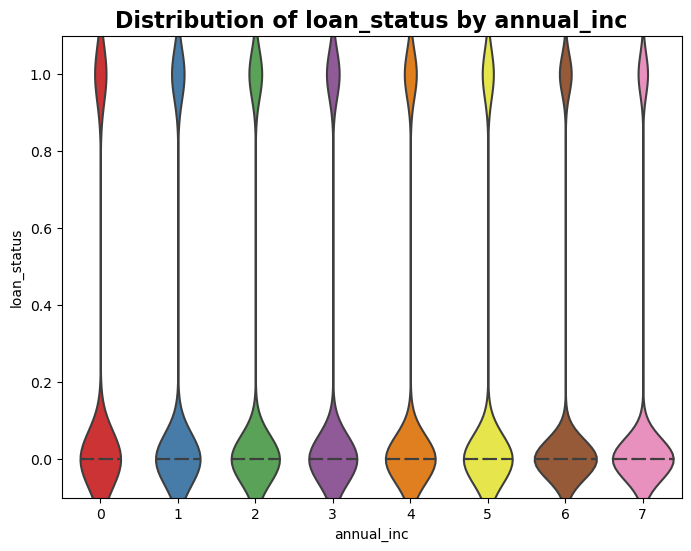

In [58]:
view_relationship('annual_inc', 'loan_status', dataset)

### How do you want to treat the two FICO scores ?

In [59]:
bins = [0, 700, 750, 800, float('inf')]
labels = [0, 1, 2, 3]

dataset['fico_range_low'] = pd.cut(dataset['fico_range_low'], bins=bins, labels=labels, right=False)

dataset['fico_range_low'].value_counts()

fico_range_low
0    56857
1    24163
2     4377
3      741
Name: count, dtype: int64

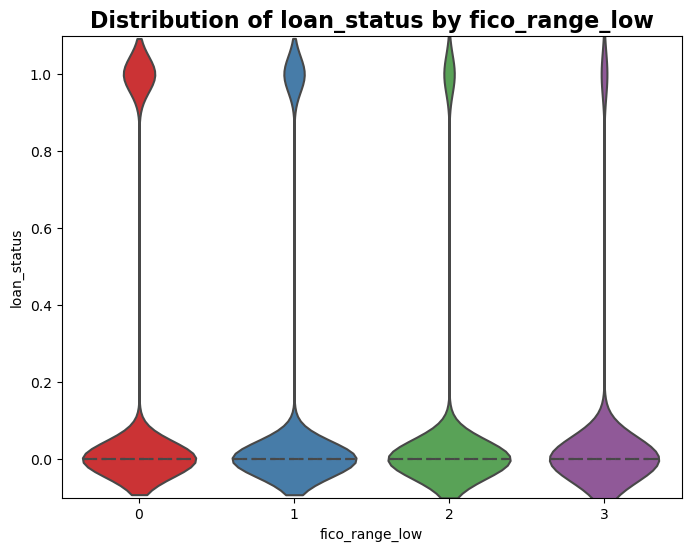

In [60]:
view_relationship('fico_range_low', 'loan_status', dataset)

In [61]:
bins = [0, 700, 750, 800, float('inf')]
labels = [0, 1, 2, 3]

dataset['fico_range_high'] = pd.cut(dataset['fico_range_high'], bins=bins, labels=labels, right=False)

dataset['fico_range_high'].value_counts()

fico_range_high
0    56857
1    24163
2     4377
3      741
Name: count, dtype: int64

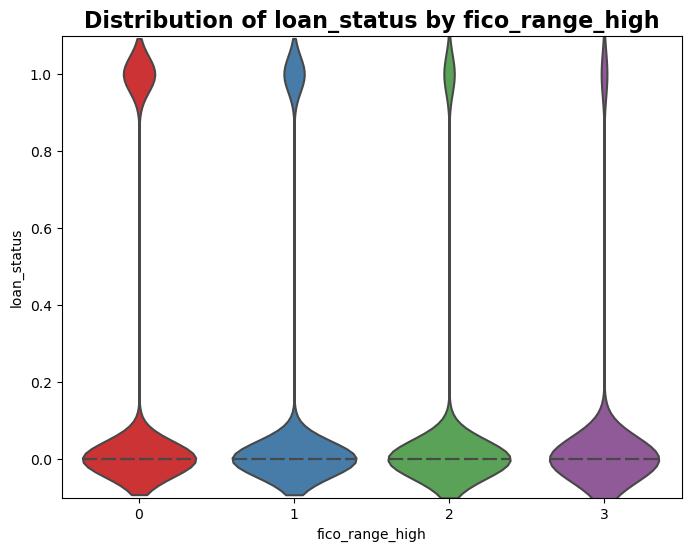

In [62]:
view_relationship('fico_range_high', 'loan_status', dataset)

<a id='3.2'></a>
## 4.2. Encoding Categorical Data

In [63]:
df_object = dataset.select_dtypes(include='object')
for i in df_object.columns:
    le = LabelEncoder()
    print('Encoding variable:', i)
    dataset[i] = le.fit_transform(dataset[i])

Encoding variable: addr_state
Encoding variable: grade
Encoding variable: home_ownership
Encoding variable: initial_list_status
Encoding variable: purpose
Encoding variable: sub_grade
Encoding variable: verification_status


<a id='3.4'></a>
## 4.3. Sampling Data

### To create a balanced dataset, draw 5500 rows at random from each of the two classes and combine them into a new dataframe.

In [64]:
new_df = pd.DataFrame()
rows_0 = dataset[dataset['loan_status'] == 0].sample(n=5500, random_state=42)
rows_1 = dataset[dataset['loan_status'] == 1].sample(n=5500, random_state=42)
new_df = pd.concat([rows_0, rows_1]).reset_index(drop=True)
new_df

,funded_amnt,addr_state,annual_inc,dti,fico_range_high,fico_range_low,grade,home_ownership,initial_list_status,installment,...,term,verification_status,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,10800.0,19,5,2.73,1,1,0,1,1,219.97,...,60,0,8890.79,3.0,62.0,183.0,19.9,33876.0,8121.0,0.0
1,3500.0,10,0,22.26,0,0,0,1,0,108.27,...,36,0,107.95,2.0,1.0,141.0,23.1,5847.0,3793.0,1.0
2,29225.0,3,6,15.06,0,0,2,1,1,670.21,...,60,1,18771.45,8.0,3.0,123.0,57.7,7480.0,16220.0,13.0
3,24175.0,12,3,18.94,0,0,1,3,1,791.35,...,36,1,791.10,3.0,29.0,183.0,98.8,346.0,6671.0,0.0
4,9000.0,40,6,12.50,1,1,1,3,0,286.92,...,36,0,3099.25,5.0,16.0,99.0,87.1,2385.0,3091.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,11625.0,29,6,0.88,0,0,4,1,1,314.43,...,60,2,314.43,3.0,2.0,346.0,85.6,187.0,64653.0,2.0
10996,12000.0,29,3,14.09,0,0,3,3,0,293.67,...,60,1,293.67,4.0,10.0,96.0,98.9,208.0,3398.0,2.0
10997,25000.0,9,6,26.61,0,0,2,2,1,581.45,...,60,2,581.45,6.0,2.0,187.0,47.0,20881.0,8507.0,6.0
10998,16300.0,43,3,28.11,0,0,6,1,0,486.40,...,60,2,216.05,5.0,8.0,179.0,94.9,372.0,13934.0,7.0


In [65]:
new_df['loan_status'].value_counts()

loan_status
0    5500
1    5500
Name: count, dtype: int64

### Choose a method to handle any NAs that may be in a column.

In [66]:
for i in new_df.columns:
    if new_df[i].isnull().mean() > 0:
        print(i + 'has ' , new_df[i].isnull().sum() , ' nan values')

revol_utilhas  4  nan values
bc_utilhas  141  nan values
bc_open_to_buyhas  129  nan values


In [67]:
for i in new_df.columns:
    if new_df[i].isnull().mean() > 0:
        new_df[i] = new_df[i].fillna(new_df[i].mean())

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

### Use an 80:20 split

In [68]:
X = new_df.drop('loan_status', axis=1)
y = new_df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


### Use K-Folds cross validation with 10 folds and 'roc-auc' as your score.

In [69]:
nb_folds = 10
scoring = 'roc_auc'

def eval_model_kfold(model, X_train, y_train, N, s): #Evaluate a model and gives the average roc score
    
    scores = cross_val_score(model, X_train, y_train, cv=N, scoring=s)
    average_score = np.mean(scores) # Calculate average score
    print(f"Model: {model.__class__.__name__}, Average ROC AUC Score: {average_score:.4f}")
    
    return average_score, scores

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

### Use a wide range of classification models. I have added them below to a Python list.

Note: We also tried to test the Support Vector Classifier model but decided not to perform it below because it is too long to run

In [70]:
# Example usage with models defined in your list

models = [
    ('LR', LogisticRegression(max_iter=1000, random_state=123)),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier(random_state=123)),
    ('NB', GaussianNB()),
    ('NN', MLPClassifier(max_iter=1000, random_state=123)), # Neural Network
    ('AB', AdaBoostClassifier(random_state=123)), # Boosting methods
    ('RF', RandomForestClassifier(random_state=123)), # Bagging methods
    # ('SVC', SVC(probability=True, random_state=123)) # Support Vector Classifier
]

# Lists to store average scores and K-Fold scores
avg_model_scores = []
kfold_scores = []
names = []

# Evaluate each model and collect scores
for name, model in models:
    beg = time.time()
    print(f"Evaluating {name} model:")
    avg_score, scores = eval_model_kfold(model, X_train, y_train, nb_folds, scoring)

    avg_model_scores.append((name, avg_score))  # Store average score
    kfold_scores.append(scores)  # Store K-Fold scores
    names.append(name)  # Store model name
    end = time.time()
    print(f"Time taken: {end - beg:.2f} seconds\n")

Evaluating LR model:
Model: LogisticRegression, Average ROC AUC Score: 0.9160
Time taken: 9.90 seconds

Evaluating KNN model:
Model: KNeighborsClassifier, Average ROC AUC Score: 0.8154
Time taken: 0.87 seconds

Evaluating DT model:
Model: DecisionTreeClassifier, Average ROC AUC Score: 0.7996
Time taken: 1.40 seconds

Evaluating NB model:
Model: GaussianNB, Average ROC AUC Score: 0.9028
Time taken: 0.14 seconds

Evaluating NN model:
Model: MLPClassifier, Average ROC AUC Score: 0.8745
Time taken: 14.30 seconds

Evaluating AB model:
Model: AdaBoostClassifier, Average ROC AUC Score: 0.9266
Time taken: 7.75 seconds

Evaluating RF model:
Model: RandomForestClassifier, Average ROC AUC Score: 0.9301
Time taken: 22.91 seconds



The Random Forest model seems to be the best model 

### K-folds cross validation

Let's compute the ROC AUC score for several numbers of folds

In [71]:
kfold_scores_df = pd.DataFrame(kfold_scores)
kfold_scores_df = kfold_scores_df.T
kfold_scores_df.columns = names
kfold_scores_df.set_index(np.arange(1, 11), inplace=True)
kfold_scores_df

,LR,KNN,DT,NB,NN,AB,RF
1,0.909214,0.807928,0.796567,0.895340,0.866270,0.924103,0.932254
2,0.917257,0.815286,0.805683,0.898341,0.876050,0.924966,0.931929
3,0.912877,0.811231,0.786425,0.905005,0.880942,0.919669,0.930457
4,0.911745,0.812070,0.807941,0.897231,0.871611,0.925870,0.934984
5,0.919757,0.811505,0.813651,0.909498,0.892525,0.933290,0.928367
6,0.912376,0.815825,0.788677,0.905162,0.866069,0.924710,0.924119
7,0.921498,0.834170,0.798948,0.905604,0.897386,0.935439,0.934326
8,0.925387,0.798806,0.809080,0.904457,0.874816,0.930173,0.930785
9,0.909602,0.814155,0.802273,0.897867,0.846699,0.920842,0.918871
10,0.920418,0.832577,0.786364,0.909881,0.872699,0.927141,0.934923


In [72]:
kfold_scores_df.mean()

LR     0.916013
KNN    0.815355
DT     0.799561
NB     0.902839
NN     0.874507
AB     0.926620
RF     0.930101
dtype: float64

The Random Forest model has the highest score for different numbers of folds

### Plot a model comparison using a BoxPlot to capture the range of values coming from the K Folds for each model

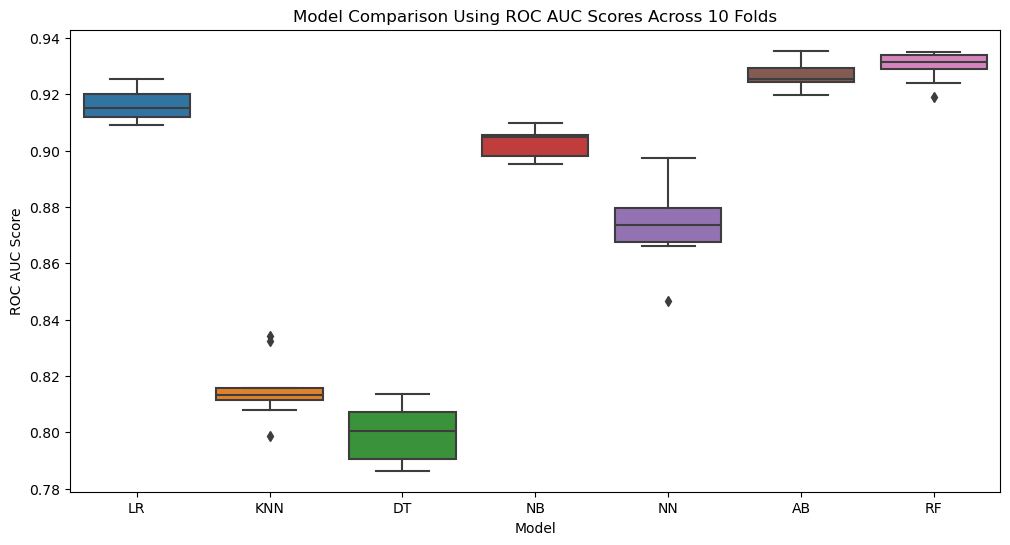

In [73]:
# Set up the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=kfold_scores_df)

# Customize plot labels and title
plt.title('Model Comparison Using ROC AUC Scores Across 10 Folds')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')

# Show the plot
plt.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

### Choose the best model and do some hyperparameter tuning by looping over the hyper parameters of the model to fine-tune the model. Do this using the GridSearch features in Scikit Learn.

We have to beat 0.9301 that has been previously obtained

Hyperparameters for the Random Forest model
* **max_depth** : the maximum level of each tree. A deeper tree is more overfitted. So, a high value makes the model fail to generalize.
* **n_estimators** : the number of trees in the forest.
* **max_features** : the number of features. This is one of the main hyperparameters that prevents overfitting. The square root of the total number of features is recommended.
* **min_samples_leaf** : the minimum number of samples required to be at the leaf node of each tree.



In [74]:
rf_model = RandomForestClassifier(random_state=123)

# Define a simplified parameter grid
param_grid = {
    'n_estimators': [100, 300],           # Fewer options for the number of trees
    'max_depth': [None, 10, 20],          # Reduced choices for max depth
    'min_samples_split': [10, 20, 40],    # Limited options for min samples split
    'min_samples_leaf': [1, 2],           # Limited options for min samples at leaf
    'max_features': ['sqrt'],             # Reduced choices for max features
}


# Set up the GridSearch with scoring based on ROC AUC
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=3,                    # Reduced to 3-fold cross-validation to save time
                           n_jobs=-1,               # Use all available cores
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best ROC AUC score achieved: ", best_score)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 300}
Best ROC AUC score achieved:  0.9306350175749256


In [75]:
best_rf_model = grid_search.best_estimator_

<a id='6'></a>
# 7. Finalise the Model

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

### Calculate the fine-tuned model results on the test dataset. Calculate accuracy, confusion matrix, the classification report. Discuss results.

In [76]:
# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.8550


In [77]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[899, 209],
       [110, 982]], dtype=int64)

In [79]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1108
           1       0.82      0.90      0.86      1092

    accuracy                           0.85      2200
   macro avg       0.86      0.86      0.85      2200
weighted avg       0.86      0.85      0.85      2200



### Calculate the ROC curve for the model and its AUC

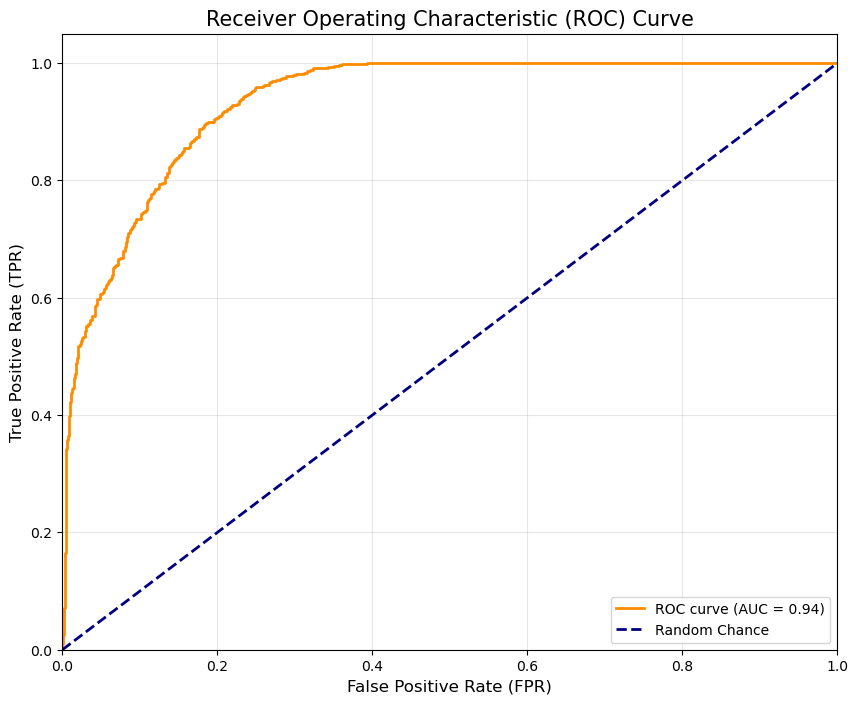

In [ ]:

# Assuming `best_model` is your fine-tuned Random Forest model
# Generate probability predictions for the positive class
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

### Examine the importance of each of the model features. Some models may have a features_importances property. For others you may need to loop over features and exclude/include them to determine their impact on the score.

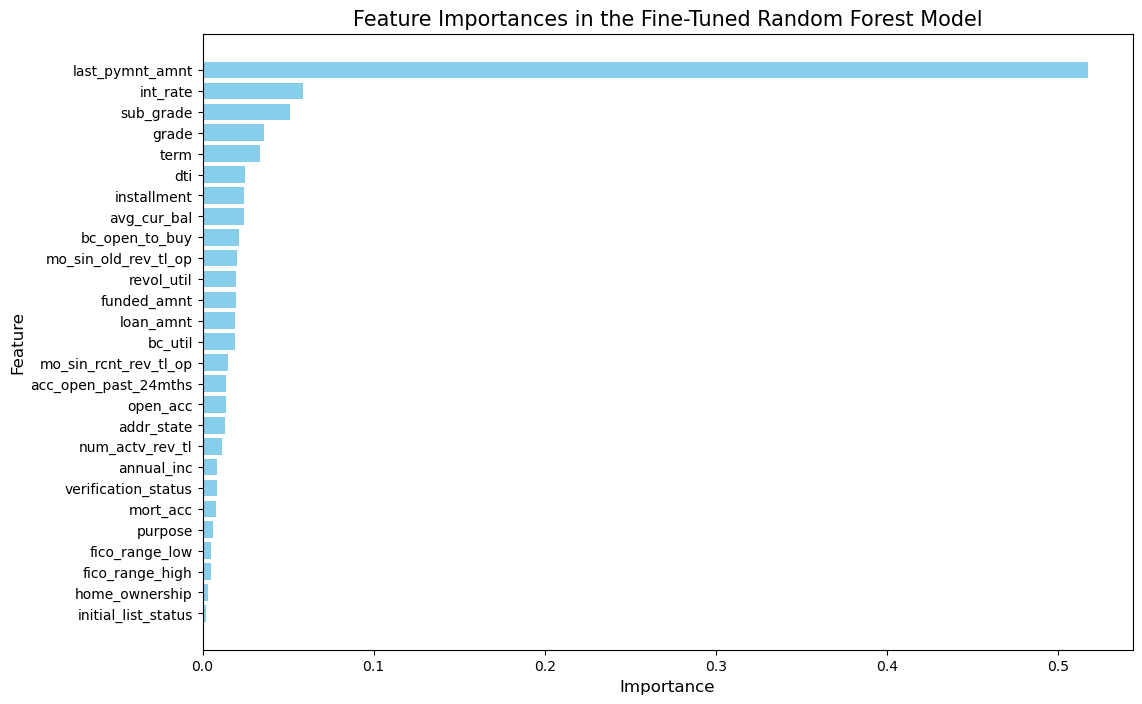

In [81]:
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances in the Fine-Tuned Random Forest Model', fontsize=15)
plt.gca().invert_yaxis()
plt.show()

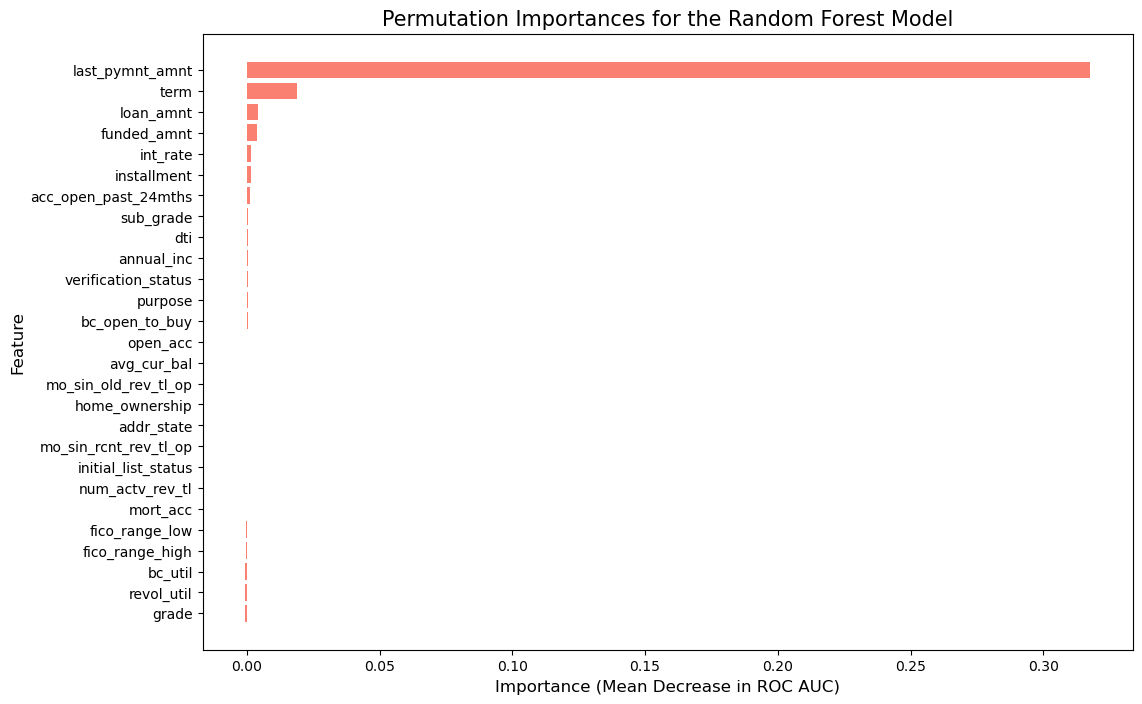

In [82]:
# Use permutation importance
perm_importance = permutation_importance(best_rf_model, X_test, y_test, scoring='roc_auc', n_repeats=10, random_state=123)

# Organize results into a DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='salmon')
plt.xlabel('Importance (Mean Decrease in ROC AUC)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Permutation Importances for the Random Forest Model', fontsize=15)
plt.gca().invert_yaxis()
plt.show()

# My Suggestions

This is where you can put your extra analysis work. Try to keep it to one main idea. This will help your coursework grade, especially if makes the model work better ;-)

In [ ]:
important_features = ['last_pymnt_amnt', 'int_rate', 'sub_grade', 'grade', 'term', 'loan_status']

new_df = new_df[important_features]
scaler = StandardScaler()
new_df = scaler.fit_transform(new_df)

X = new_df[:, :-1]
y = new_df[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Lists to store average scores and K-Fold scores
avg_model_scores = []
kfold_scores = []
names = []

# Evaluate each model and collect scores
for name, model in models:
    beg = time.time()
    print(f"Evaluating {name} model:")
    avg_score, scores = eval_model_kfold(model, X_train, y_train, nb_folds, scoring)

    avg_model_scores.append((name, avg_score))  # Store average score
    kfold_scores.append(scores)  # Store K-Fold scores
    names.append(name)  # Store model name
    end = time.time()
    print(f"Time taken: {end - beg:.2f} seconds\n")

Evaluating LR model:
Model: LogisticRegression, Average ROC AUC Score: 0.9115
Time taken: 0.45 seconds

Evaluating KNN model:
Model: KNeighborsClassifier, Average ROC AUC Score: 0.9014
Time taken: 0.21 seconds

Evaluating DT model:
Model: DecisionTreeClassifier, Average ROC AUC Score: 0.8478
Time taken: 0.31 seconds

Evaluating NB model:
Model: GaussianNB, Average ROC AUC Score: 0.9135
Time taken: 0.04 seconds

Evaluating NN model:
Model: MLPClassifier, Average ROC AUC Score: 0.9150
Time taken: 40.24 seconds

Evaluating AB model:
Model: AdaBoostClassifier, Average ROC AUC Score: 0.9226
Time taken: 2.55 seconds

Evaluating RF model:
Model: RandomForestClassifier, Average ROC AUC Score: 0.9197
Time taken: 8.32 seconds



## Conclusion

### Write a short summary of what you have found.